In [120]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv('../datastore/training/FPL_data_24_25.csv')
print(dataset.head(10))
print(dataset.shape) #407, 13

   first_name           second_name  now_cost  starts  goals_scored  assists  \
0     Gabriel     Fernando de Jesus       6.5       6             3        2   
1     Gabriel  dos Santos Magalhães       6.1      28             3        2   
2         Kai               Havertz       7.7      21             9        3   
3        Karl                  Hein       4.0       0             0        0   
4     Jurriën                Timber       5.5      27             1        3   
5  Jorge Luiz          Frello Filho       4.6       9             0        0   
6       Jakub                Kiwior       4.9      10             1        0   
7     Gabriel      Martinelli Silva       6.5      25             8        4   
8       Ethan               Nwaneri       4.3      11             4        2   
9      Martin              Ødegaard       8.2      26             3        9   

   goal_contributions  total_points  points_per_game     roi  roi_per_gw  \
0                   5            42        

In [121]:
data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (642, 16)
Unseen Data For Predictions: (161, 16)


In [122]:
from pycaret.regression import *
s = setup(data = data, target = 'roi', session_id=7177, ignore_features=['first_name', 'second_name', 'team_name', 'team', 'element_type'])
print(s)

,Description,Value
0,Session id,7177
1,Target,roi
2,Target type,Regression
3,Original data shape,"(642, 16)"
4,Transformed data shape,"(642, 11)"
5,Transformed train set shape,"(449, 11)"
6,Transformed test set shape,"(193, 11)"
7,Ignore features,5
8,Numeric features,10
9,Preprocess,True


In [123]:
best = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:51:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5943,5.5903,1.6160,0.9891,0.0575,0.0608,0.0140
rf,Random Forest Regressor,0.9677,18.3872,3.2803,0.9503,0.0684,0.0739,0.0180
gbr,Gradient Boosting Regressor,0.9182,21.0926,3.1850,0.9466,0.0820,0.0864,0.0120
ada,AdaBoost Regressor,1.9288,20.7908,3.5591,0.9336,0.4791,0.5338,0.0080
dt,Decision Tree Regressor,1.2695,32.8541,4.2490,0.9080,0.0941,0.0956,0.0030
knn,K Neighbors Regressor,2.3699,50.1372,6.0460,0.8254,0.2522,0.3789,0.0050
lightgbm,Light Gradient Boosting Machine,2.5537,58.3763,6.3224,0.8062,0.4584,0.6307,0.2330
llar,Lasso Least Angle Regression,3.8024,53.3240,6.4959,0.7669,0.7885,1.2751,0.0030
lasso,Lasso Regression,3.8028,53.3274,6.4963,0.7668,0.7883,1.2750,0.1200
br,Bayesian Ridge,4.0044,49.3715,6.4605,0.7602,0.8702,1.4771,0.0040


In [124]:
et = create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:51:34
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3346,0.3213,0.5668,0.9988,0.0397,0.0388
1,0.4052,0.4855,0.6968,0.9925,0.0609,0.0687
2,1.2087,12.9835,3.6033,0.9802,0.0716,0.1064
3,0.4517,0.6708,0.8190,0.9928,0.0845,0.0559
4,0.6287,2.2448,1.4983,0.9848,0.0502,0.0562
5,1.4783,36.9861,6.0816,0.9614,0.0597,0.0571
6,0.3488,0.8849,0.9407,0.9947,0.0453,0.0571
7,0.2964,0.2375,0.4874,0.9954,0.0497,0.0583
8,0.3331,0.4251,0.6520,0.9981,0.0401,0.0400


In [125]:
tuned_et = tune_model(et)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:51:41
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7512,1.5332,1.2382,0.9942,0.1588,0.1438
1,0.7493,1.5957,1.2632,0.9755,0.1282,0.1312
2,3.1168,130.7155,11.4331,0.8011,0.2277,0.3085
3,0.7635,1.6268,1.2755,0.9825,0.2010,0.1104
4,1.3160,7.9367,2.8172,0.9464,0.1956,0.1618
5,4.5769,349.6608,18.6992,0.6348,0.2207,0.1485
6,0.9931,8.4821,2.9124,0.9495,0.1020,0.1468
7,0.7224,1.4274,1.1947,0.9725,0.1414,0.1703
8,1.0701,4.0129,2.0032,0.9822,0.1605,0.1719


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


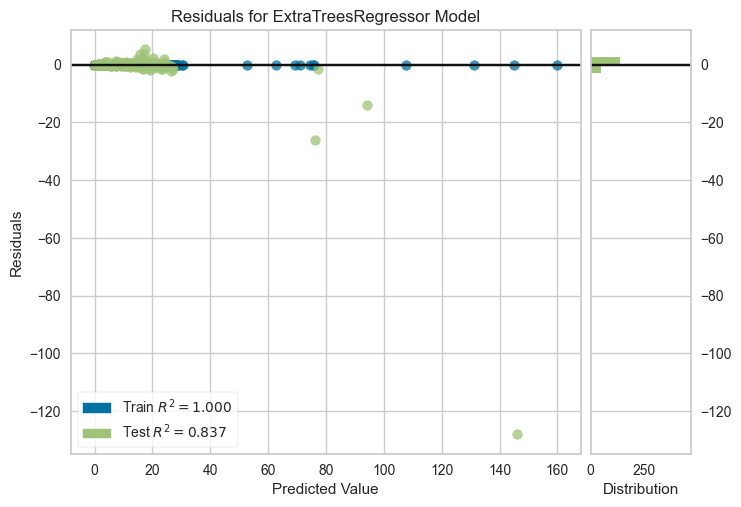

In [126]:
plot_model( et)

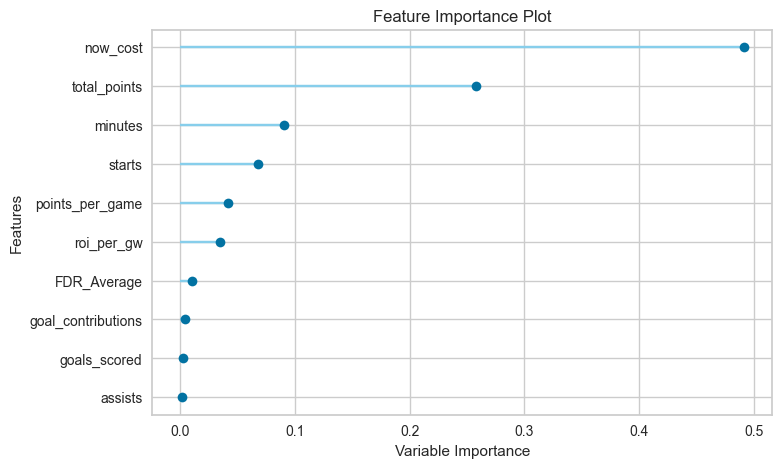

In [127]:
plot_model(et, plot='feature')

In [128]:
final_lightgbm = finalize_model(et)

In [129]:
print(et)

ExtraTreesRegressor(n_jobs=-1, random_state=7177)


In [130]:
unseen_predictions = predict_model(et, data=data_unseen)
unseen_predictions.head(100)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.9536,32.6395,5.7131,0.9244,0.0749,0.0540


,first_name,second_name,now_cost,starts,goals_scored,assists,goal_contributions,total_points,points_per_game,roi_per_gw,element_type,team_name,minutes,FDR_Average,team,roi,prediction_label
0,Karl,Hein,4.0,0,0,0,0,0,0.0,0.000000,1,Arsenal,0,7.596491,1,0.000000,0.00000
1,Jorge Luiz,Frello Filho,4.6,9,0,0,0,20,1.3,0.483111,3,Arsenal,701,7.596491,1,4.348000,4.55577
2,Gabriel,Martinelli Silva,6.5,25,8,4,12,125,3.8,0.769200,3,Arsenal,2284,7.596491,1,19.230000,19.91340
3,William,Saliba,6.4,35,2,0,2,130,3.7,0.580286,2,Arsenal,3039,7.596491,1,20.309999,21.42150
4,Thomas,Partey,4.9,31,4,3,7,108,3.1,0.710968,3,Arsenal,2793,7.596491,1,22.040001,22.26970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Phil,Foden,9.1,20,7,3,10,105,3.8,0.577000,3,Man City,1771,6.543859,13,11.540000,14.27151
96,Erling,Haaland,14.9,31,22,3,25,181,5.8,0.391935,4,Man City,2736,6.543859,13,12.150000,20.72890
97,João,Cavaco Cancelo,5.3,0,0,0,0,0,0.0,0.000000,2,Man City,0,6.543859,13,0.000000,0.00000
98,Rúben,Gato Alves Dias,5.5,25,0,0,0,90,3.3,0.654400,2,Man City,2269,6.543859,13,16.360001,18.75800


In [131]:
save_model(et,'Final et Model ROI-Target')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['now_cost', 'starts',
                                              'goals_scored', 'assists',
                                              'goal_contributions',
                                              'total_points', 'points_per_game',
                                              'roi_per_gw', 'minutes',
                                              'FDR_Average'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=7177))]),
 'Final et Model ROI-Target.pkl')

In [132]:

saved_final_lightgbm = load_model('Final et Model ROI-Target')

data_new = pd.read_csv('../datastore/current/FPL_data_5.csv')
new_prediction = predict_model(saved_final_lightgbm, data=data_new).sort_values('prediction_label', ascending=False)
new_prediction.head(100)

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1665,0.1592,0.3990,0.9120,0.1039,0.1774


,first_name,second_name,now_cost,starts,goals_scored,assists,goal_contributions,total_points,points_per_game,roi_per_gw,element_type,team_name,minutes,FDR_Average,team,roi,prediction_label
471,Erling,Haaland,14.2,4,5,0,5,37,9.2,0.651500,4,Man City,338,0.0,13,2.606,6.52264
134,Antoine,Semenyo,7.6,4,3,2,5,36,9.0,1.184250,3,Bournemouth,360,0.0,4,4.737,6.43915
7,Jurriën,Timber,5.7,3,2,1,3,34,8.5,1.988333,2,Arsenal,262,0.0,1,5.965,6.23010
279,Marc,Guéhi,4.7,4,1,0,1,29,7.2,1.542500,2,Crystal Palace,360,0.0,8,6.170,6.17491
266,João Pedro,Junqueira de Jesus,7.8,4,2,3,5,33,8.2,1.057750,4,Chelsea,330,0.0,7,4.231,6.13212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Jérémy,Doku,6.4,2,0,2,2,15,3.8,1.172000,3,Man City,195,0.0,13,2.344,3.27700
169,Michael,Kayode,4.5,4,0,0,0,14,3.5,0.777750,2,Brentford,346,0.0,5,3.111,3.21412
40,Lucas,Digne,4.5,3,0,0,0,14,3.5,1.037000,2,Aston Villa,250,0.0,2,3.111,3.20856
401,Anton,Stach,5.0,4,0,1,1,14,3.5,0.700000,3,Leeds,360,0.0,11,2.800,3.17326


In [4]:
import pandas as pd
from pycaret.regression import *

historical = pd.read_csv(f"../datastore/training/FPL_data_24_25.csv")
new_data = pd.read_csv(f"../datastore/current/FPL_data_6.csv")
print(historical.shape)
print(new_data.shape)

    # s = setup(data=new_data, target='roi', session_id=123)
    # updated_model = create_model(roi_model)

combined_data = pd.concat([historical, new_data], ignore_index=True)


print(combined_data.shape)
combined_data = combined_data[(combined_data["starts"] >  0 )]
print('-------------------------')
print(combined_data.shape)
print(combined_data.head(10))

# Debug: Check roi column
print('ROI stats:')
print(combined_data['roi'].describe())
print('Unique ROI values:', combined_data['roi'].nunique())

data = combined_data.sample(frac=0.80, random_state=786)
data_unseen = combined_data.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

# Debug: Check sampled data
print('Data for modeling shape:', data.shape)
print('ROI in sampled data - unique values:', data['roi'].nunique())


s = setup(data=data, target='roi', session_id=7177,ignore_features=['first_name', 'second_name', 'team_name', 'team', 'element_type'])
et_retrain = create_model('et')
tuned_et = tune_model(et_retrain)
final_retrained_model = finalize_model(tuned_et)

save_model(final_retrained_model, 'Final et Model ROI-Target - Retrained')
print(str(final_retrained_model))

(803, 16)
(742, 16)
(1545, 16)
-------------------------
(836, 16)
    first_name           second_name  now_cost  starts  goals_scored  assists  \
0      Gabriel     Fernando de Jesus       6.5       6             3        2   
1      Gabriel  dos Santos Magalhães       6.1      28             3        2   
2          Kai               Havertz       7.7      21             9        3   
4      Jurriën                Timber       5.5      27             1        3   
5   Jorge Luiz          Frello Filho       4.6       9             0        0   
6        Jakub                Kiwior       4.9      10             1        0   
7      Gabriel      Martinelli Silva       6.5      25             8        4   
8        Ethan               Nwaneri       4.3      11             4        2   
9       Martin              Ødegaard       8.2      26             3        9   
10       David           Raya Martin       5.6      38             0        0   

    goal_contributions  total_points  poi

,Description,Value
0,Session id,7177
1,Target,roi
2,Target type,Regression
3,Original data shape,"(669, 16)"
4,Transformed data shape,"(669, 11)"
5,Transformed train set shape,"(468, 11)"
6,Transformed test set shape,"(201, 11)"
7,Ignore features,5
8,Numeric features,10
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:47:07
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3519,0.5717,0.7561,0.9861,0.0690,0.0589
1,0.2490,0.2235,0.4728,0.9943,0.0448,0.0398
2,0.4038,0.6213,0.7882,0.9913,0.0709,0.0515
3,0.2809,0.2590,0.5089,0.9952,0.0453,0.0369
4,0.4115,0.5420,0.7362,0.9919,0.0474,0.0422
5,0.3661,0.5328,0.7300,0.9911,0.0455,0.0393
6,0.5841,1.9369,1.3917,0.9731,0.0860,0.0599
7,0.3036,0.2957,0.5438,0.9935,0.0397,0.0357
8,0.3865,0.3894,0.6240,0.9924,0.0871,0.0866


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:47:10
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7593,1.7948,1.3397,0.9563,0.1468,0.2074
1,0.6741,1.4094,1.1872,0.9643,0.1151,0.1165
2,0.6911,1.2793,1.1310,0.9821,0.1336,0.2050
3,0.5709,0.7557,0.8693,0.9860,0.1022,0.0959
4,0.8096,1.4955,1.2229,0.9778,0.1125,0.1237
5,0.6368,0.9717,0.9857,0.9838,0.0978,0.1147
6,1.0141,3.6582,1.9126,0.9492,0.1382,0.1853
7,0.5818,1.0821,1.0403,0.9764,0.0980,0.0995
8,0.7855,1.2224,1.1056,0.9760,0.1703,0.2319


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved
Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['now_cost', 'starts',
                                             'goals_scored', 'assists',
                                             'goal_contributions',
                                             'total_points', 'points_per_game',
                                             'roi_per_gw', 'minutes',
                                             'FDR_Average'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'